# 00 Load Data

Follow this tutorial from SIMBA: https://simba-bio.readthedocs.io/en/latest/multiome_shareseq.html

In [126]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
import os
import simba as si
si.__version__

'1.2'

In [128]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from refs import celltype_colors

In [114]:
workdir = '../results/00'
si.settings.set_workdir(workdir)

Saving results in: ../results/00


In [115]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})
# to make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


/var/folders/h3/49kgmgs54yv7pd7wbst2wfv80000gp/T/ipykernel_34044/2786123911.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# Download data

In [116]:
dict_adata = si.datasets.multiome_ma2020_fig4()


In [117]:
adata_CP = dict_adata['atac']
adata_CG = dict_adata['rna']

# Preprocessing and Data quality

## ATACseq

In [9]:
si.pp.filter_peaks(adata_CP,min_n_cells=3)
si.pp.cal_qc_atac(adata_CP)

Before filtering: 
6436 cells, 344592 peaks
Filter peaks based on min_n_cells
After filtering out low-expressed peaks: 
6436 cells, 332987 peaks


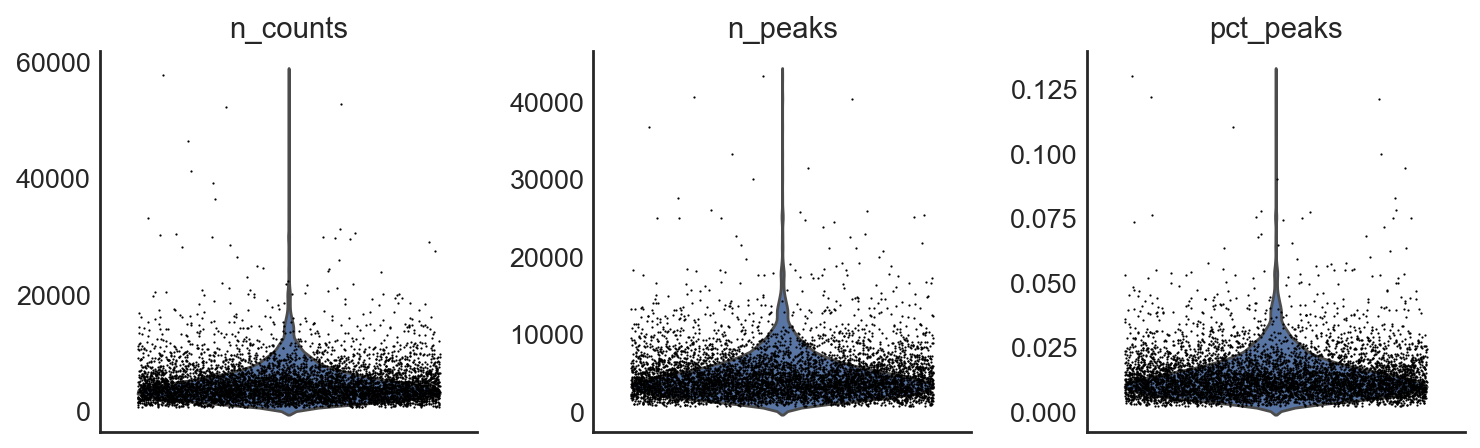

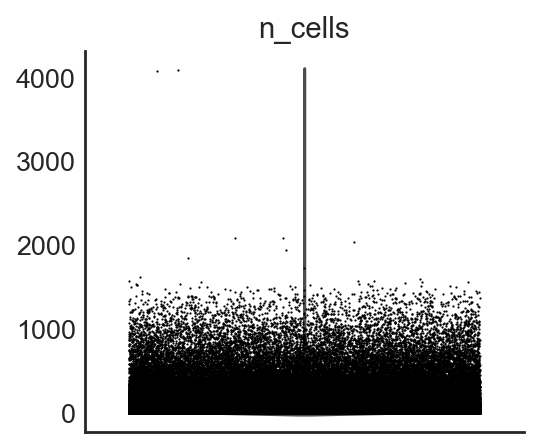

In [10]:
si.pl.violin(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], list_var=['n_cells'])


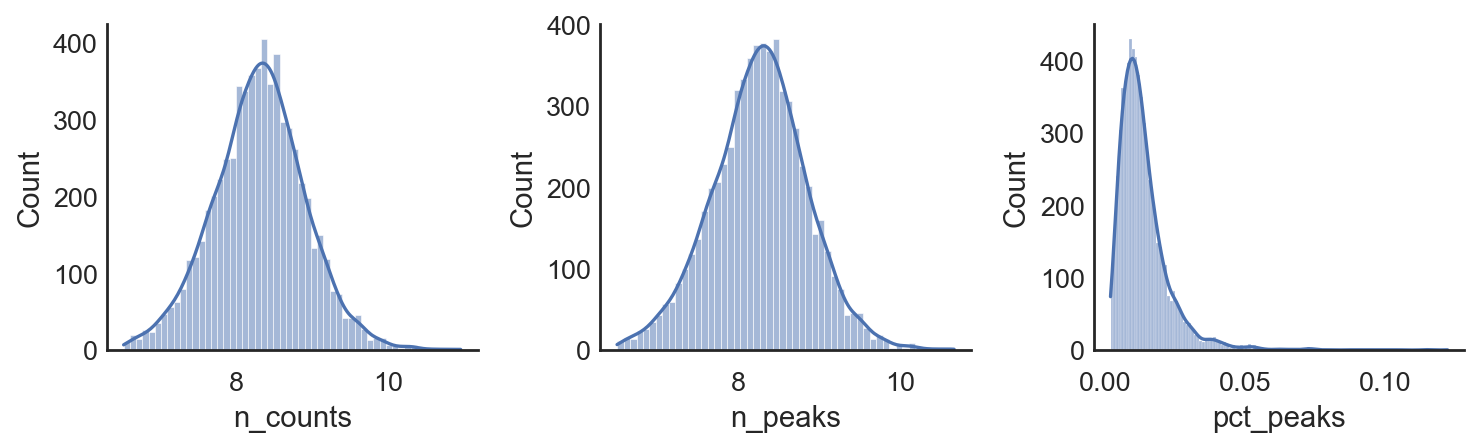

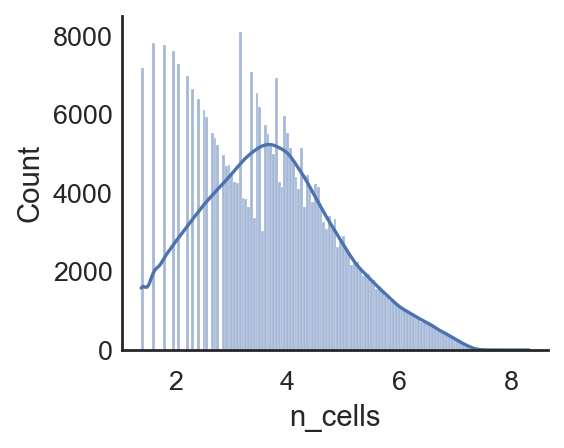

In [11]:
si.pl.hist(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], log=True, list_var=['n_cells'])


the number of selected PC is: 40
#features selected from PC 0: 55512
#features selected from PC 1: 55574
#features selected from PC 2: 55528
#features selected from PC 3: 55555
#features selected from PC 4: 55560
#features selected from PC 5: 55525
#features selected from PC 6: 55497
#features selected from PC 7: 55502
#features selected from PC 8: 55672
#features selected from PC 9: 55506
#features selected from PC 10: 55572
#features selected from PC 11: 55692
#features selected from PC 12: 55859
#features selected from PC 13: 55515
#features selected from PC 14: 55589
#features selected from PC 15: 55524
#features selected from PC 16: 55620
#features selected from PC 17: 55526
#features selected from PC 18: 55498
#features selected from PC 19: 55650
#features selected from PC 20: 55533
#features selected from PC 21: 55530
#features selected from PC 22: 55508
#features selected from PC 23: 55674
#features selected from PC 24: 55525
#features selected from PC 25: 55576
#features selec

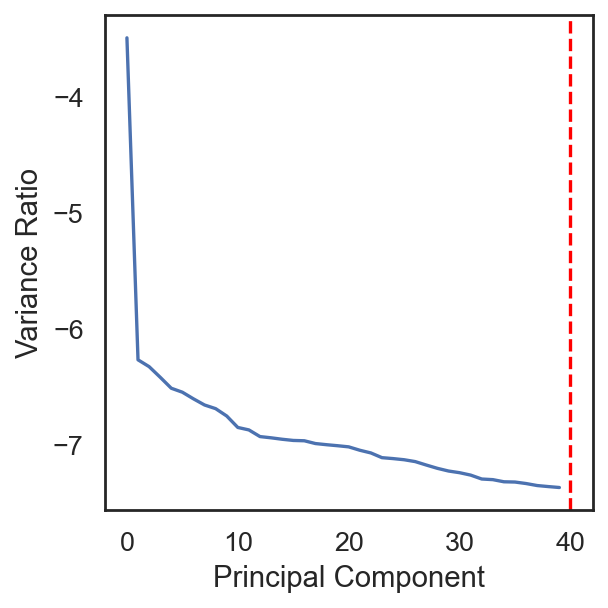

In [12]:
si.pp.pca(adata_CP, n_components=40)
si.pl.pca_variance_ratio(adata_CP)
si.pp.select_pcs_features(adata_CP)

In [13]:
adata_CP_annot_fn = os.path.join(workdir, 'atac_annot.h5ad')
print(adata_CP_annot_fn)
adata_CP.write(adata_CP_annot_fn)


../results/00/atac_annot.h5ad


## RNAseq

In [118]:
si.pp.filter_genes(adata_CG,min_n_cells=3)
si.pp.cal_qc_rna(adata_CG)

Before filtering: 
6436 cells, 20331 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
6436 cells, 17399 genes


In [119]:
adata_CG.obs

,celltype,n_counts,n_genes,pct_genes,pct_mt
Trial60.skin.R1.01.R2.06.R3.83.P1.55,TAC-1,1261.0,753,0.043278,0.000000
Trial60.skin.R1.01.R2.11.R3.86.P1.56,TAC-1,1808.0,1264,0.072648,0.000553
Trial60.skin.R1.01.R2.15.R3.09.P1.55,TAC-1,1220.0,717,0.041209,0.001639
Trial60.skin.R1.01.R2.17.R3.81.P1.53,TAC-1,1850.0,1087,0.062475,0.001622
Trial60.skin.R1.01.R2.18.R3.95.P1.54,TAC-1,1830.0,760,0.043681,0.000000
...,...,...,...,...,...
Trial60.skin.R1.96.R2.73.R3.72.P1.56,Hair Shaft-cuticle.cortex,357.0,247,0.014196,0.000000
Trial60.skin.R1.96.R2.82.R3.52.P1.55,Hair Shaft-cuticle.cortex,1475.0,1018,0.058509,0.000000
Trial60.skin.R1.96.R2.83.R3.68.P1.54,Hair Shaft-cuticle.cortex,1384.0,624,0.035864,0.000723
Trial60.skin.R1.96.R2.87.R3.63.P1.55,Hair Shaft-cuticle.cortex,1916.0,922,0.052992,0.003653


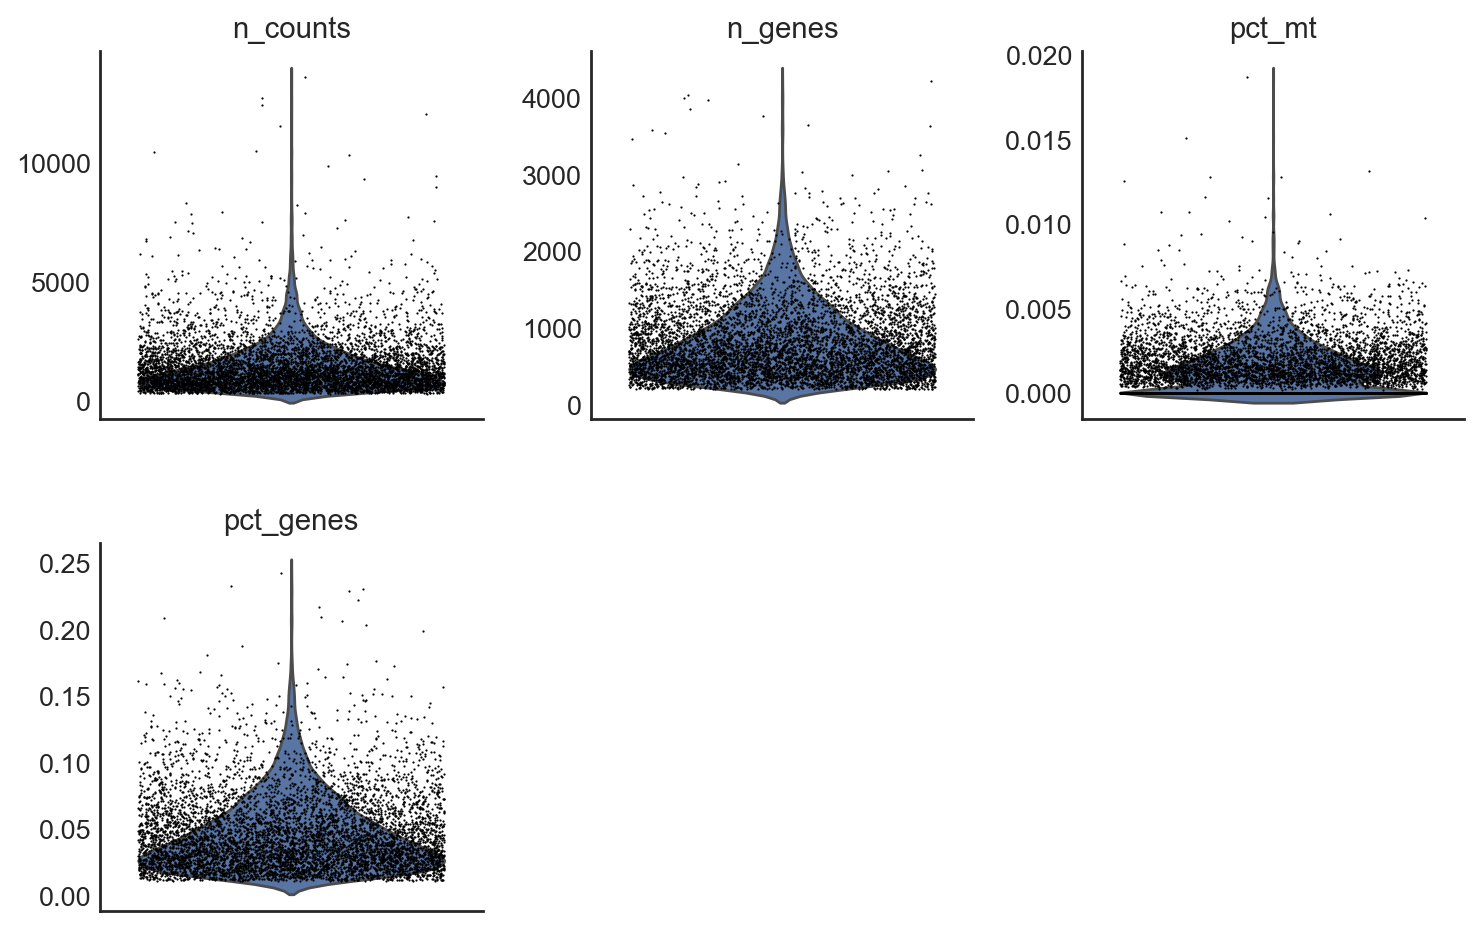

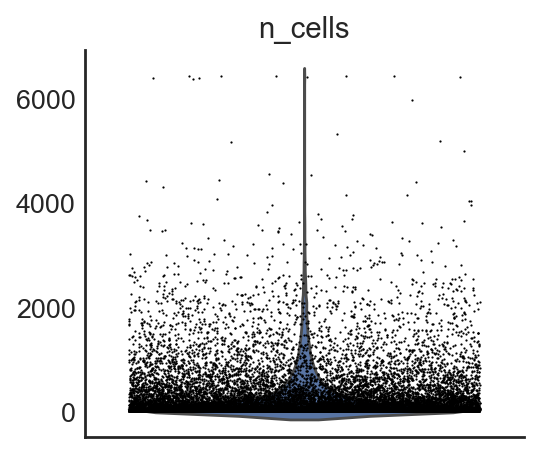

In [120]:
si.pl.violin(adata_CG,list_obs=['n_counts','n_genes','pct_mt', 'pct_genes'], list_var=['n_cells'])


In [121]:
si.pp.normalize(adata_CG,method='lib_size')
si.pp.log_transform(adata_CG)


2000 variable genes are selected.


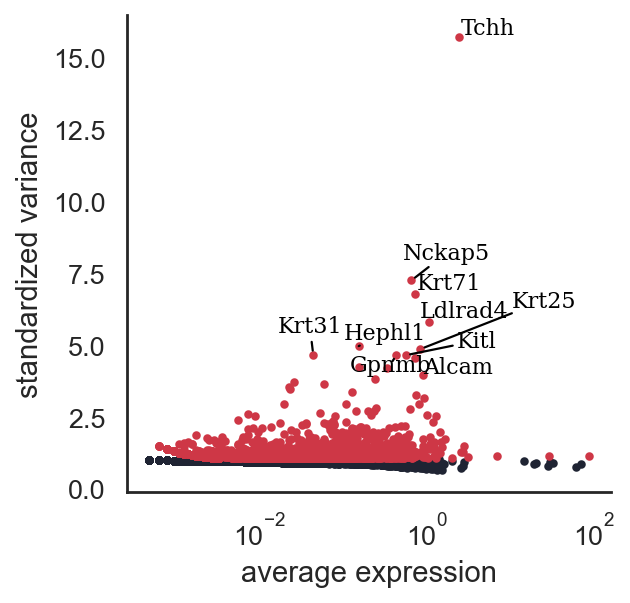

In [122]:
si.pp.select_variable_genes(adata_CG)
si.pl.variable_genes(adata_CG,show_texts=True)

In [123]:
sc.tl.pca(adata_CG)

In [125]:
adata_CG_annot_fn = os.path.join(workdir, 'rna_annot.h5ad')
print(adata_CG_annot_fn)
adata_CG.write(adata_CG_annot_fn)


../results/00/rna_annot.h5ad


# Reconstruct original lineage

Figure 4a https://www.sciencedirect.com/science/article/pii/S0092867420312538 of scATAC UMAP

In [129]:
adata_CP_fn = "../results/00/data/multiome_ma2020_fig4_atac.h5ad"
adata_CP = sc.read_h5ad(adata_CP_fn)

filtered_adata_CP_fn = "../results/00/atac_annot.h5ad"
filtered_adata_CP = sc.read_h5ad(filtered_adata_CP_fn)

adata_CG_fn = "../results/00/rna_annot.h5ad"
adata_CG = sc.read_h5ad(adata_CG_fn)


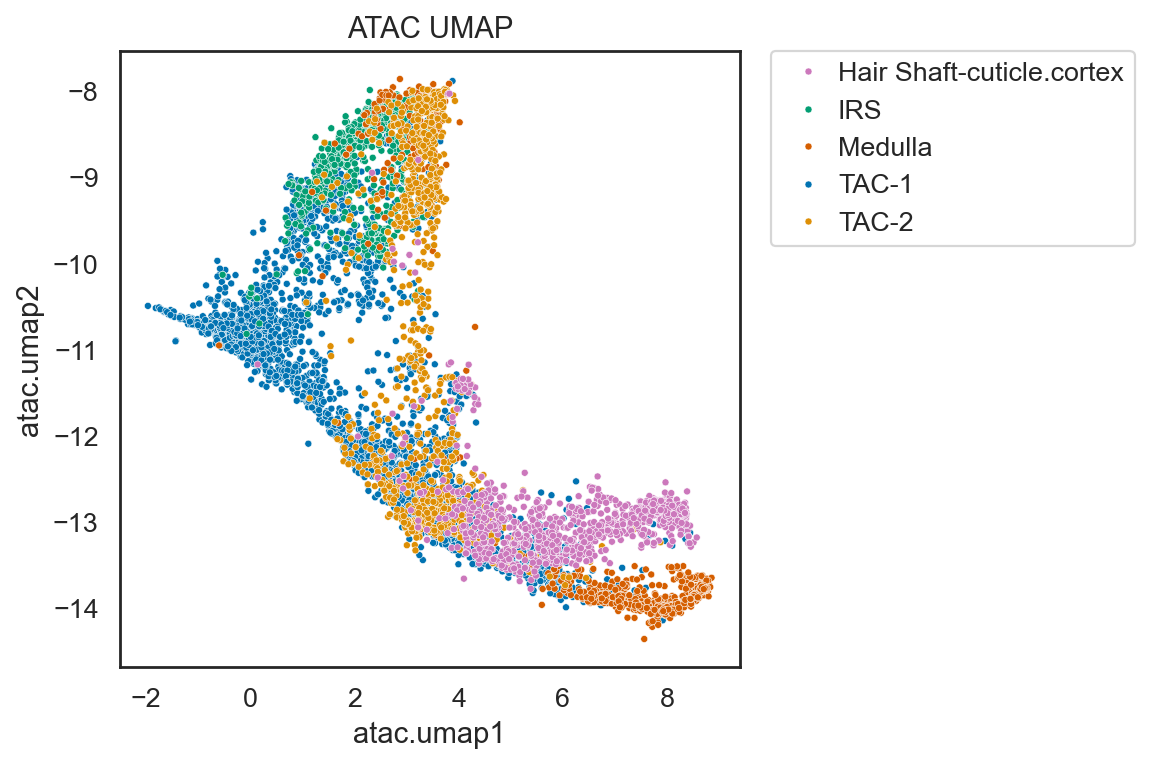

In [130]:
sns.scatterplot(x='atac.umap1', y='atac.umap2', hue='celltype', data=adata_CP.obs, s=10, palette=celltype_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ATAC UMAP')
plt.show()


In [73]:
sc.tl.pca(adata_CP)

/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/var/folders/h3/49kgmgs54yv7pd7wbst2wfv80000gp/T/ipykernel_34044/2455133639.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


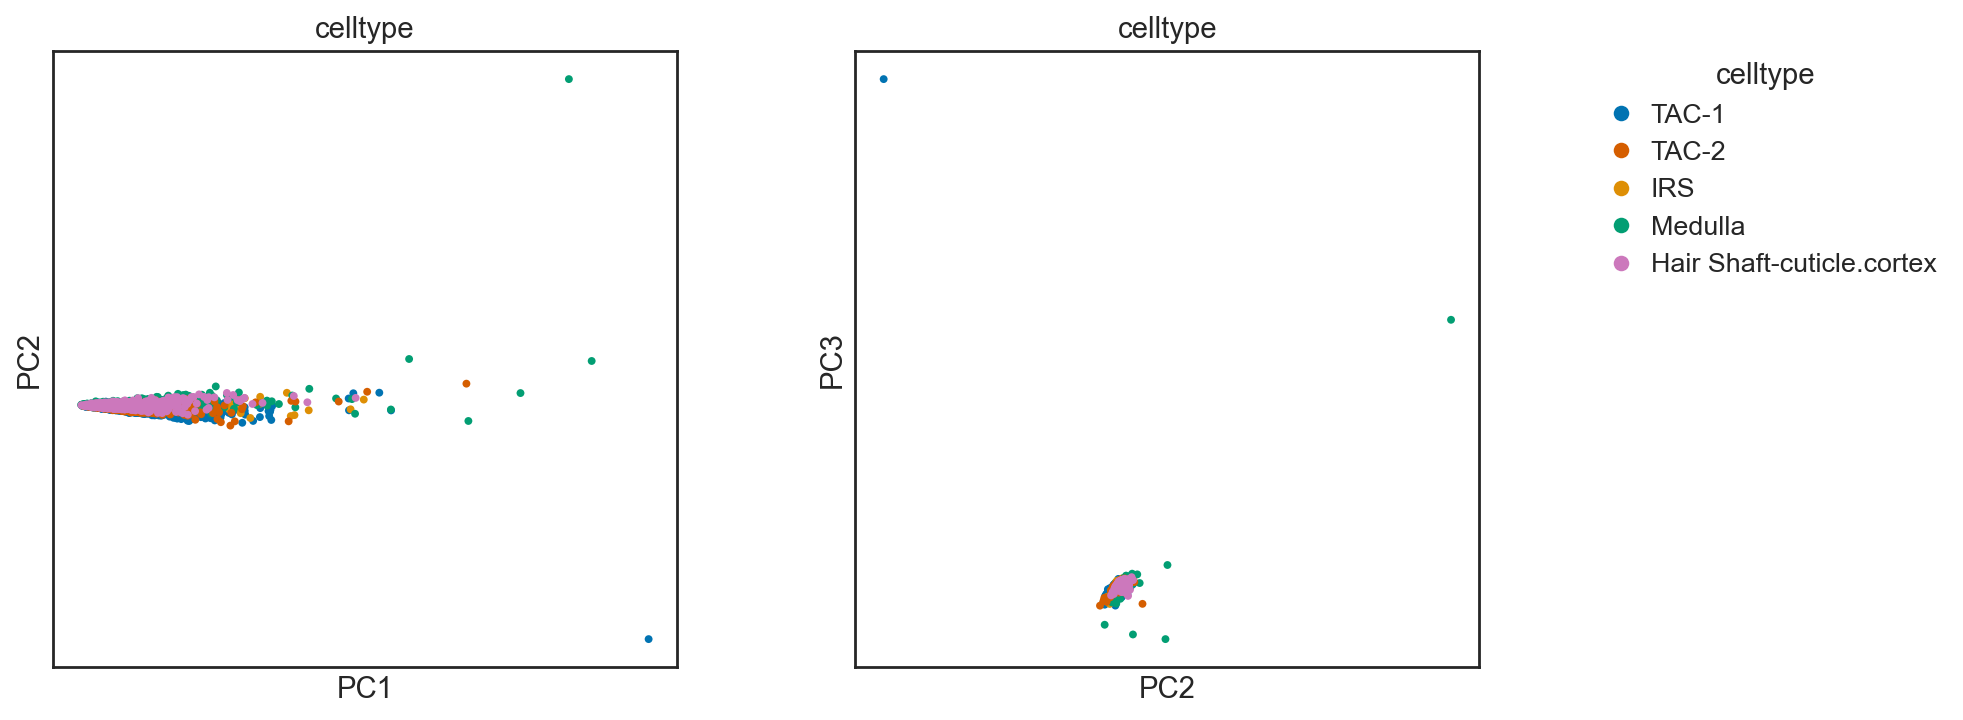

In [109]:
sc.pl.pca(
    adata_CP, color='celltype', dimensions=[(0,1), (1, 2)], ncols=2, 
    palette=celltype_colors, legend_loc=None, show=False, size=50
)
handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=color, markersize=8)
    for label, color in celltype_colors.items()
]
plt.legend(handles=handles, title='celltype', loc='best', frameon=False, bbox_to_anchor=(1.75, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


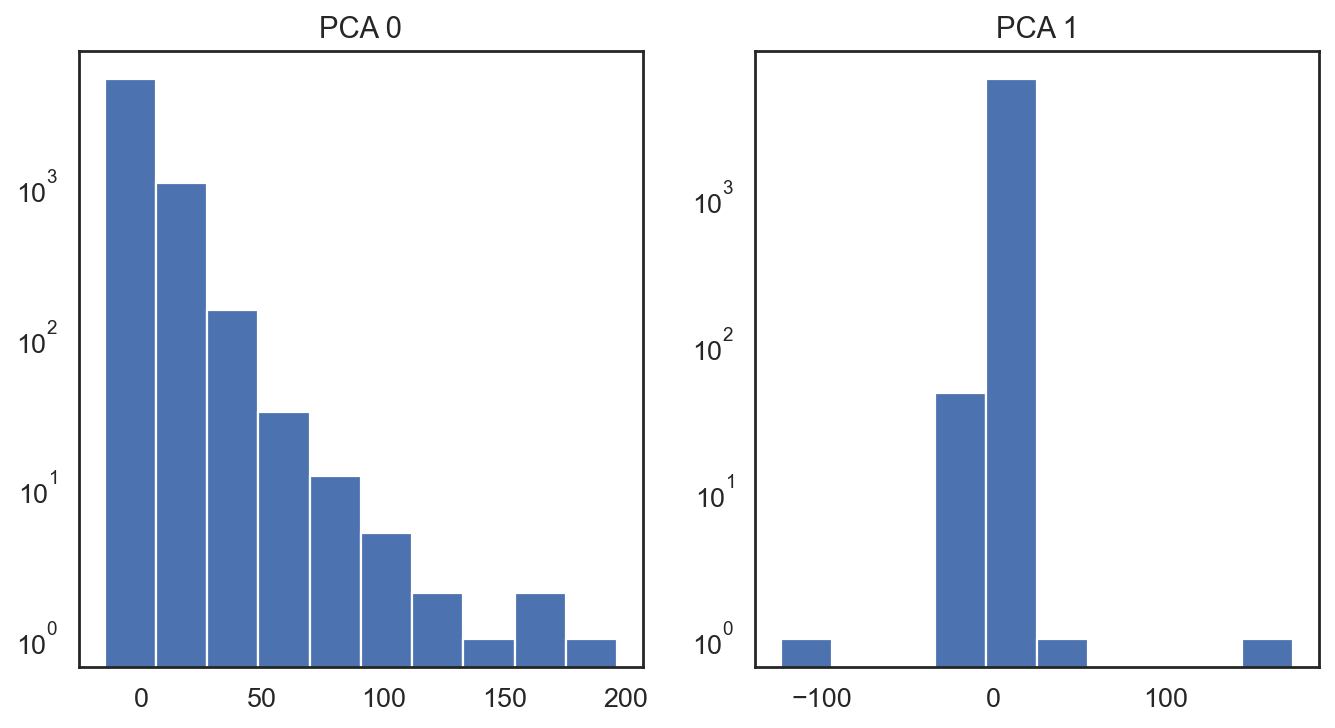

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(adata_CP.obsm['X_pca'][:, 0])
axes[0].set_yscale('log')
axes[0].set_title('PCA 0')
axes[1].hist(adata_CP.obsm['X_pca'][:, 1])
axes[1].set_yscale('log')
axes[1].set_title('PCA 1')
plt.show()

/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/var/folders/h3/49kgmgs54yv7pd7wbst2wfv80000gp/T/ipykernel_34044/1516033294.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


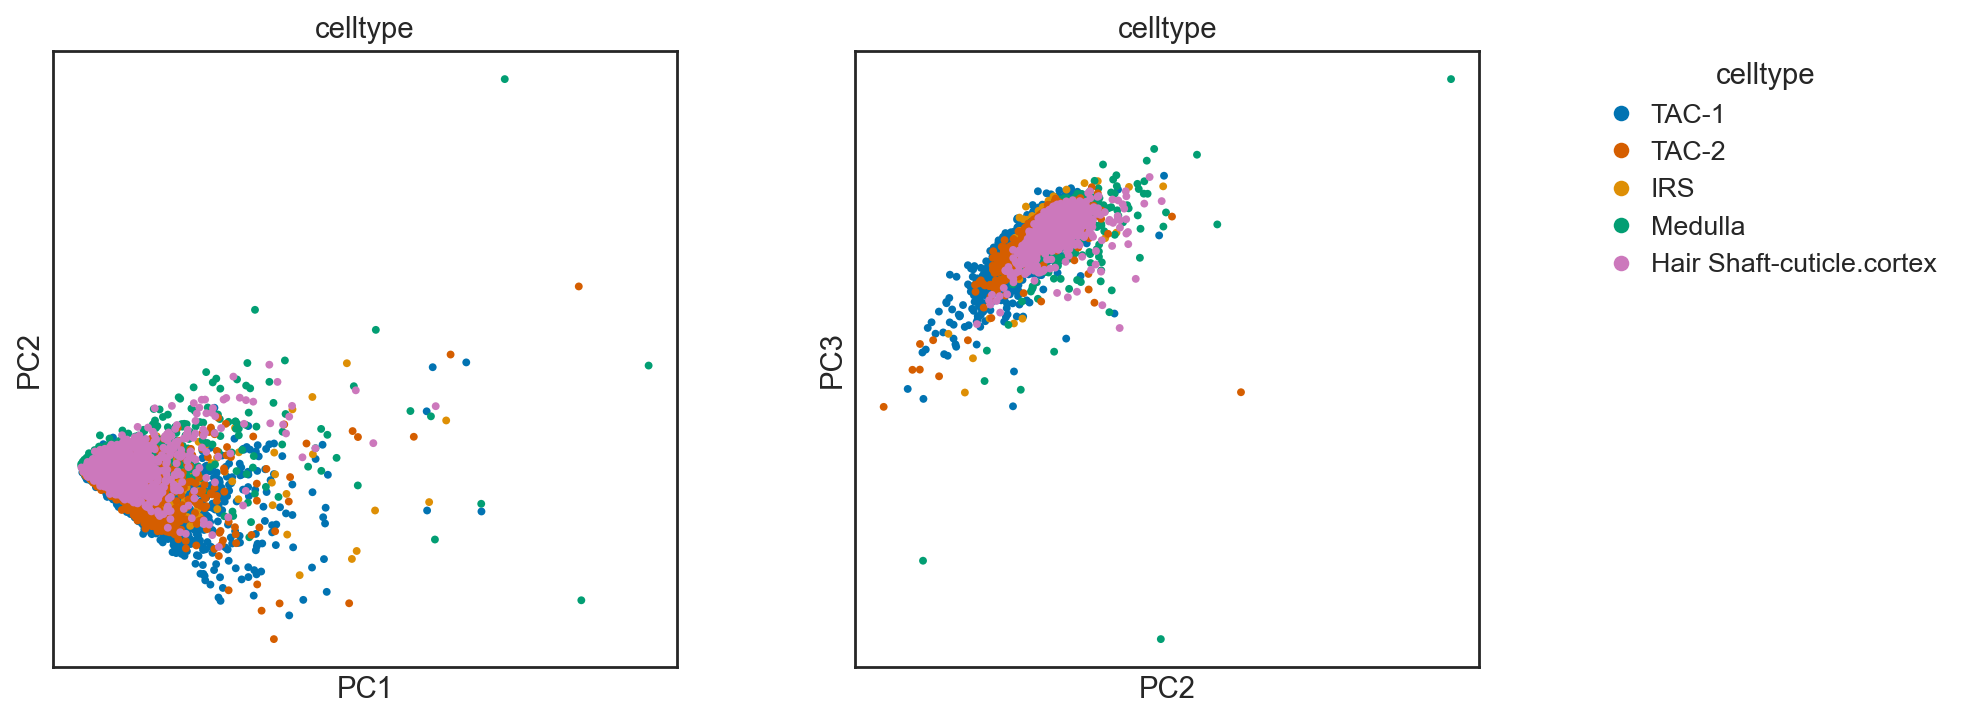

In [108]:
sc.pl.pca(
    adata_CP[
        (adata_CP.obsm['X_pca'][:, 0] < 175)&
        (np.abs(adata_CP.obsm['X_pca'][:, 1]) < 50)
    ], color='celltype', dimensions=[(0,1), (1, 2)], ncols=2, 
    palette=celltype_colors, legend_loc=None, show=False, size=50
)
handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=color, markersize=8)
    for label, color in celltype_colors.items()
]
plt.legend(handles=handles, title='celltype', loc='best', frameon=False, bbox_to_anchor=(1.75, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


## RNA embeddings

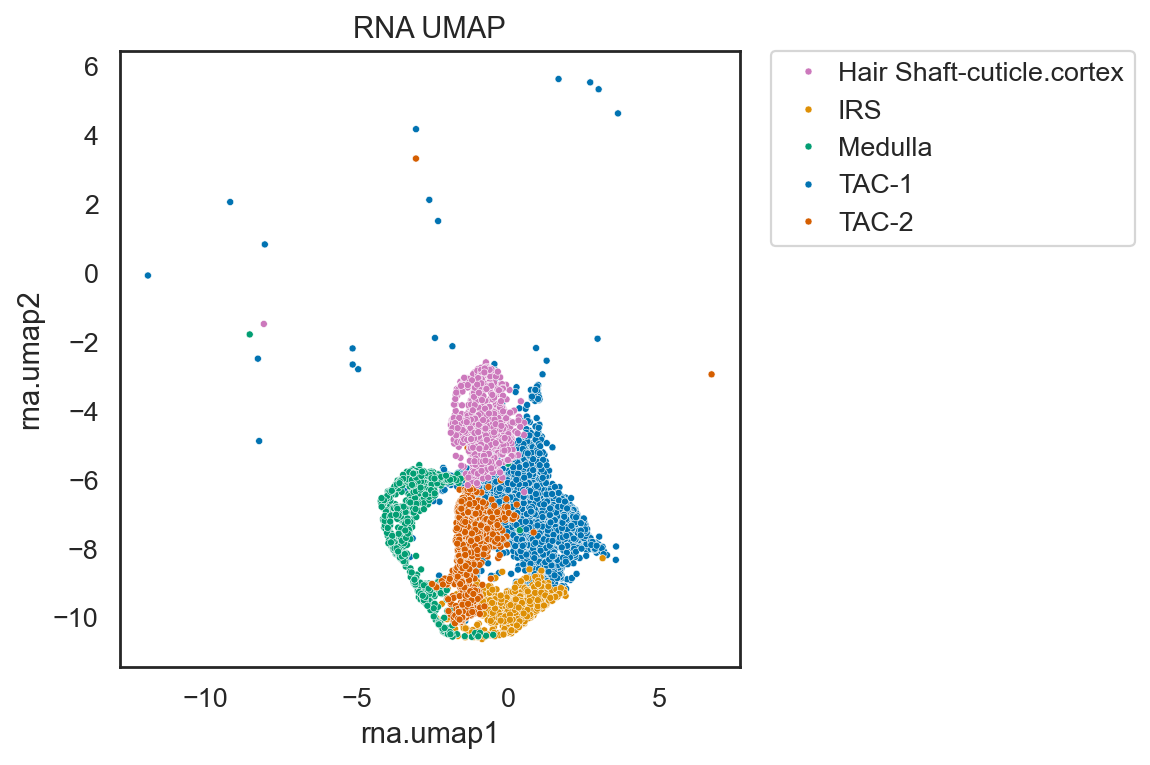

In [71]:
sns.scatterplot(x='rna.umap1', y='rna.umap2', hue='celltype', data=adata_CP.obs, s=10, palette=celltype_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('RNA UMAP')
plt.show()


In [39]:
sc.tl.pca(adata_CG)

/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cchu/Desktop/phd_work/hyperChromatin/env/hyperChrom_pyenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/var/folders/h3/49kgmgs54yv7pd7wbst2wfv80000gp/T/ipykernel_34044/3763747249.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


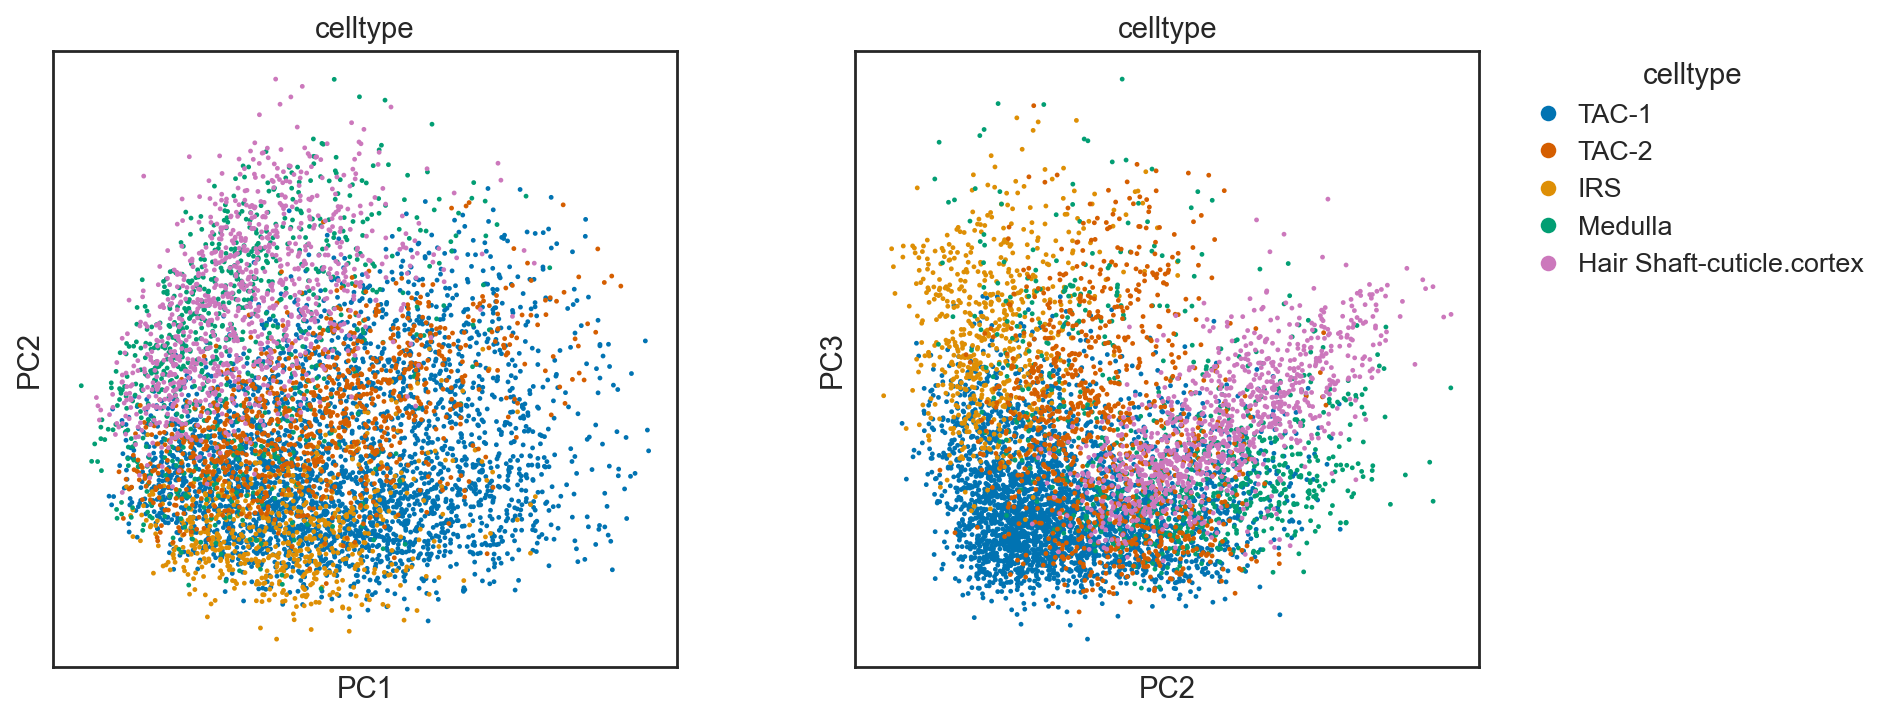

In [81]:
sc.pl.pca(
    adata_CG, color='celltype', dimensions=[(0,1), (1, 2)], 
    ncols=2, palette=celltype_colors, legend_loc=None, show=False,
)
handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=color, markersize=8)
    for label, color in celltype_colors.items()
]
plt.legend(handles=handles, title='celltype', loc='best', frameon=False, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()
